In [1]:
!python -m pip install matplotlib numpy scipy

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from math import cos, sin, pow
import numpy as np

def f(x: float):
    return x + 10 * sin(x / 10) + 15 * sin(x / 5) + 20 * sin(x / 2)

x = np.linspace(-25, 25, 2 ** 20)
f_vectorize = np.vectorize(f)
y = f_vectorize(x)

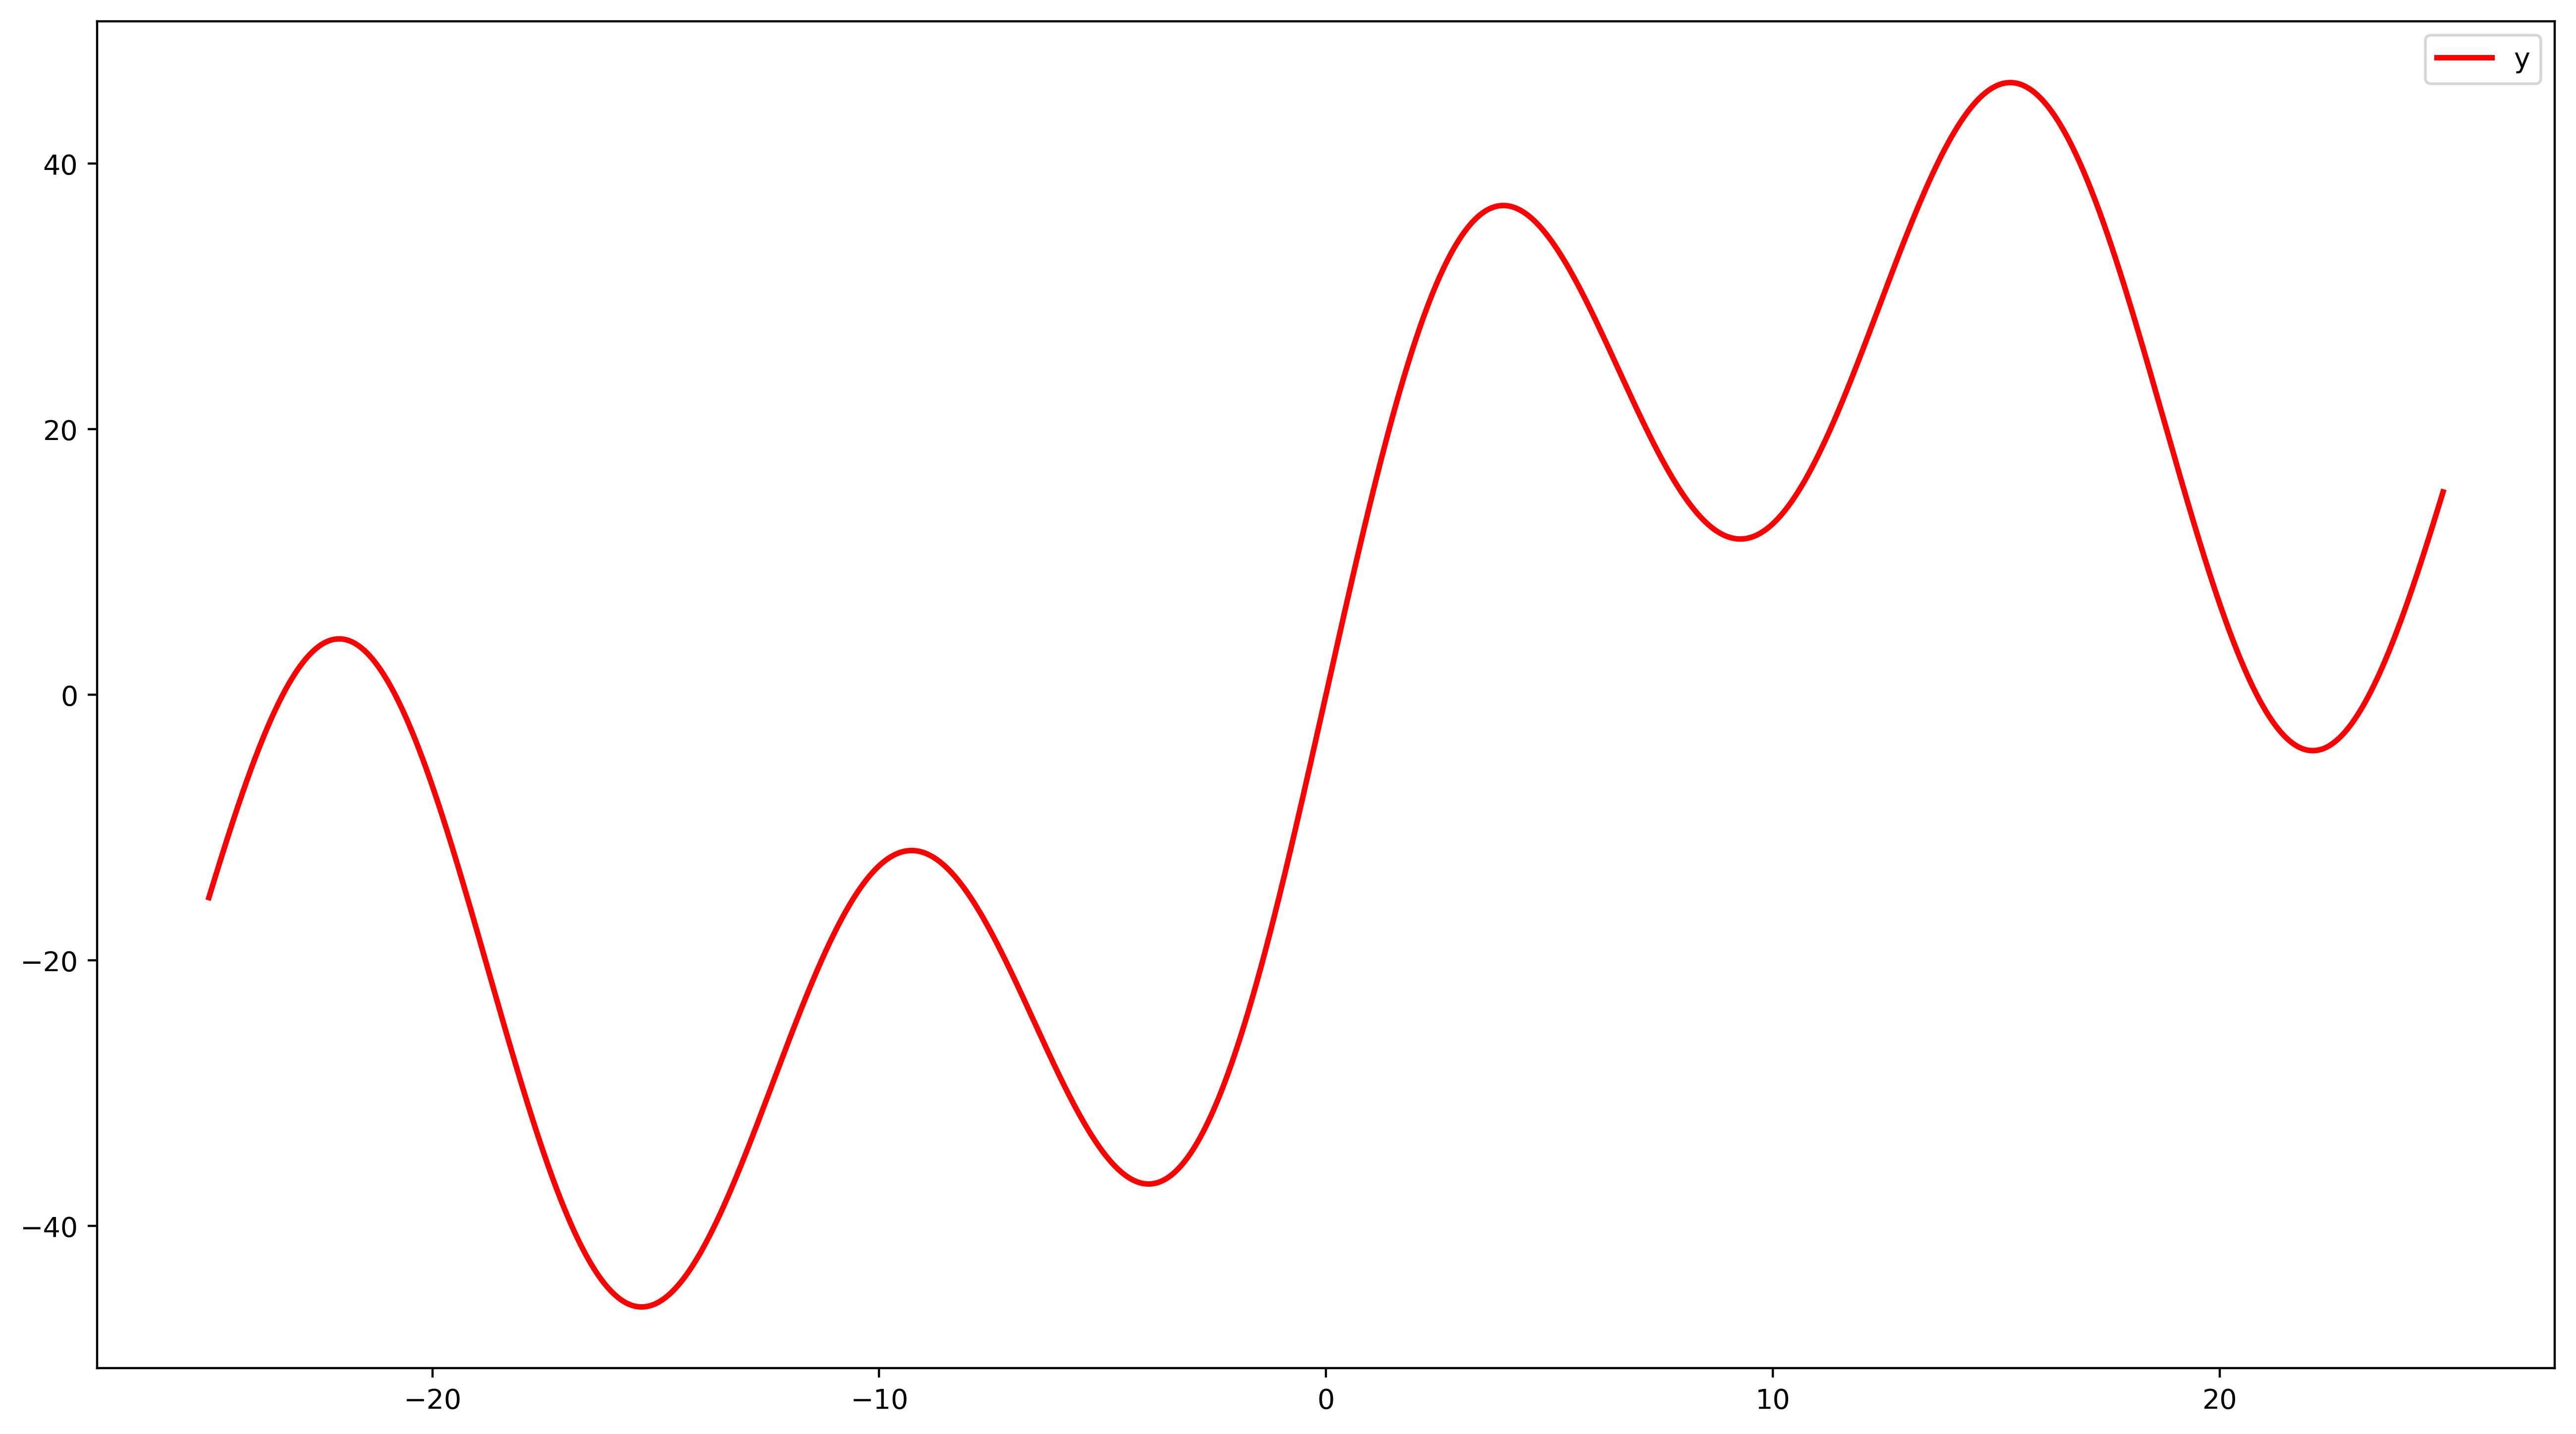

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y, color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

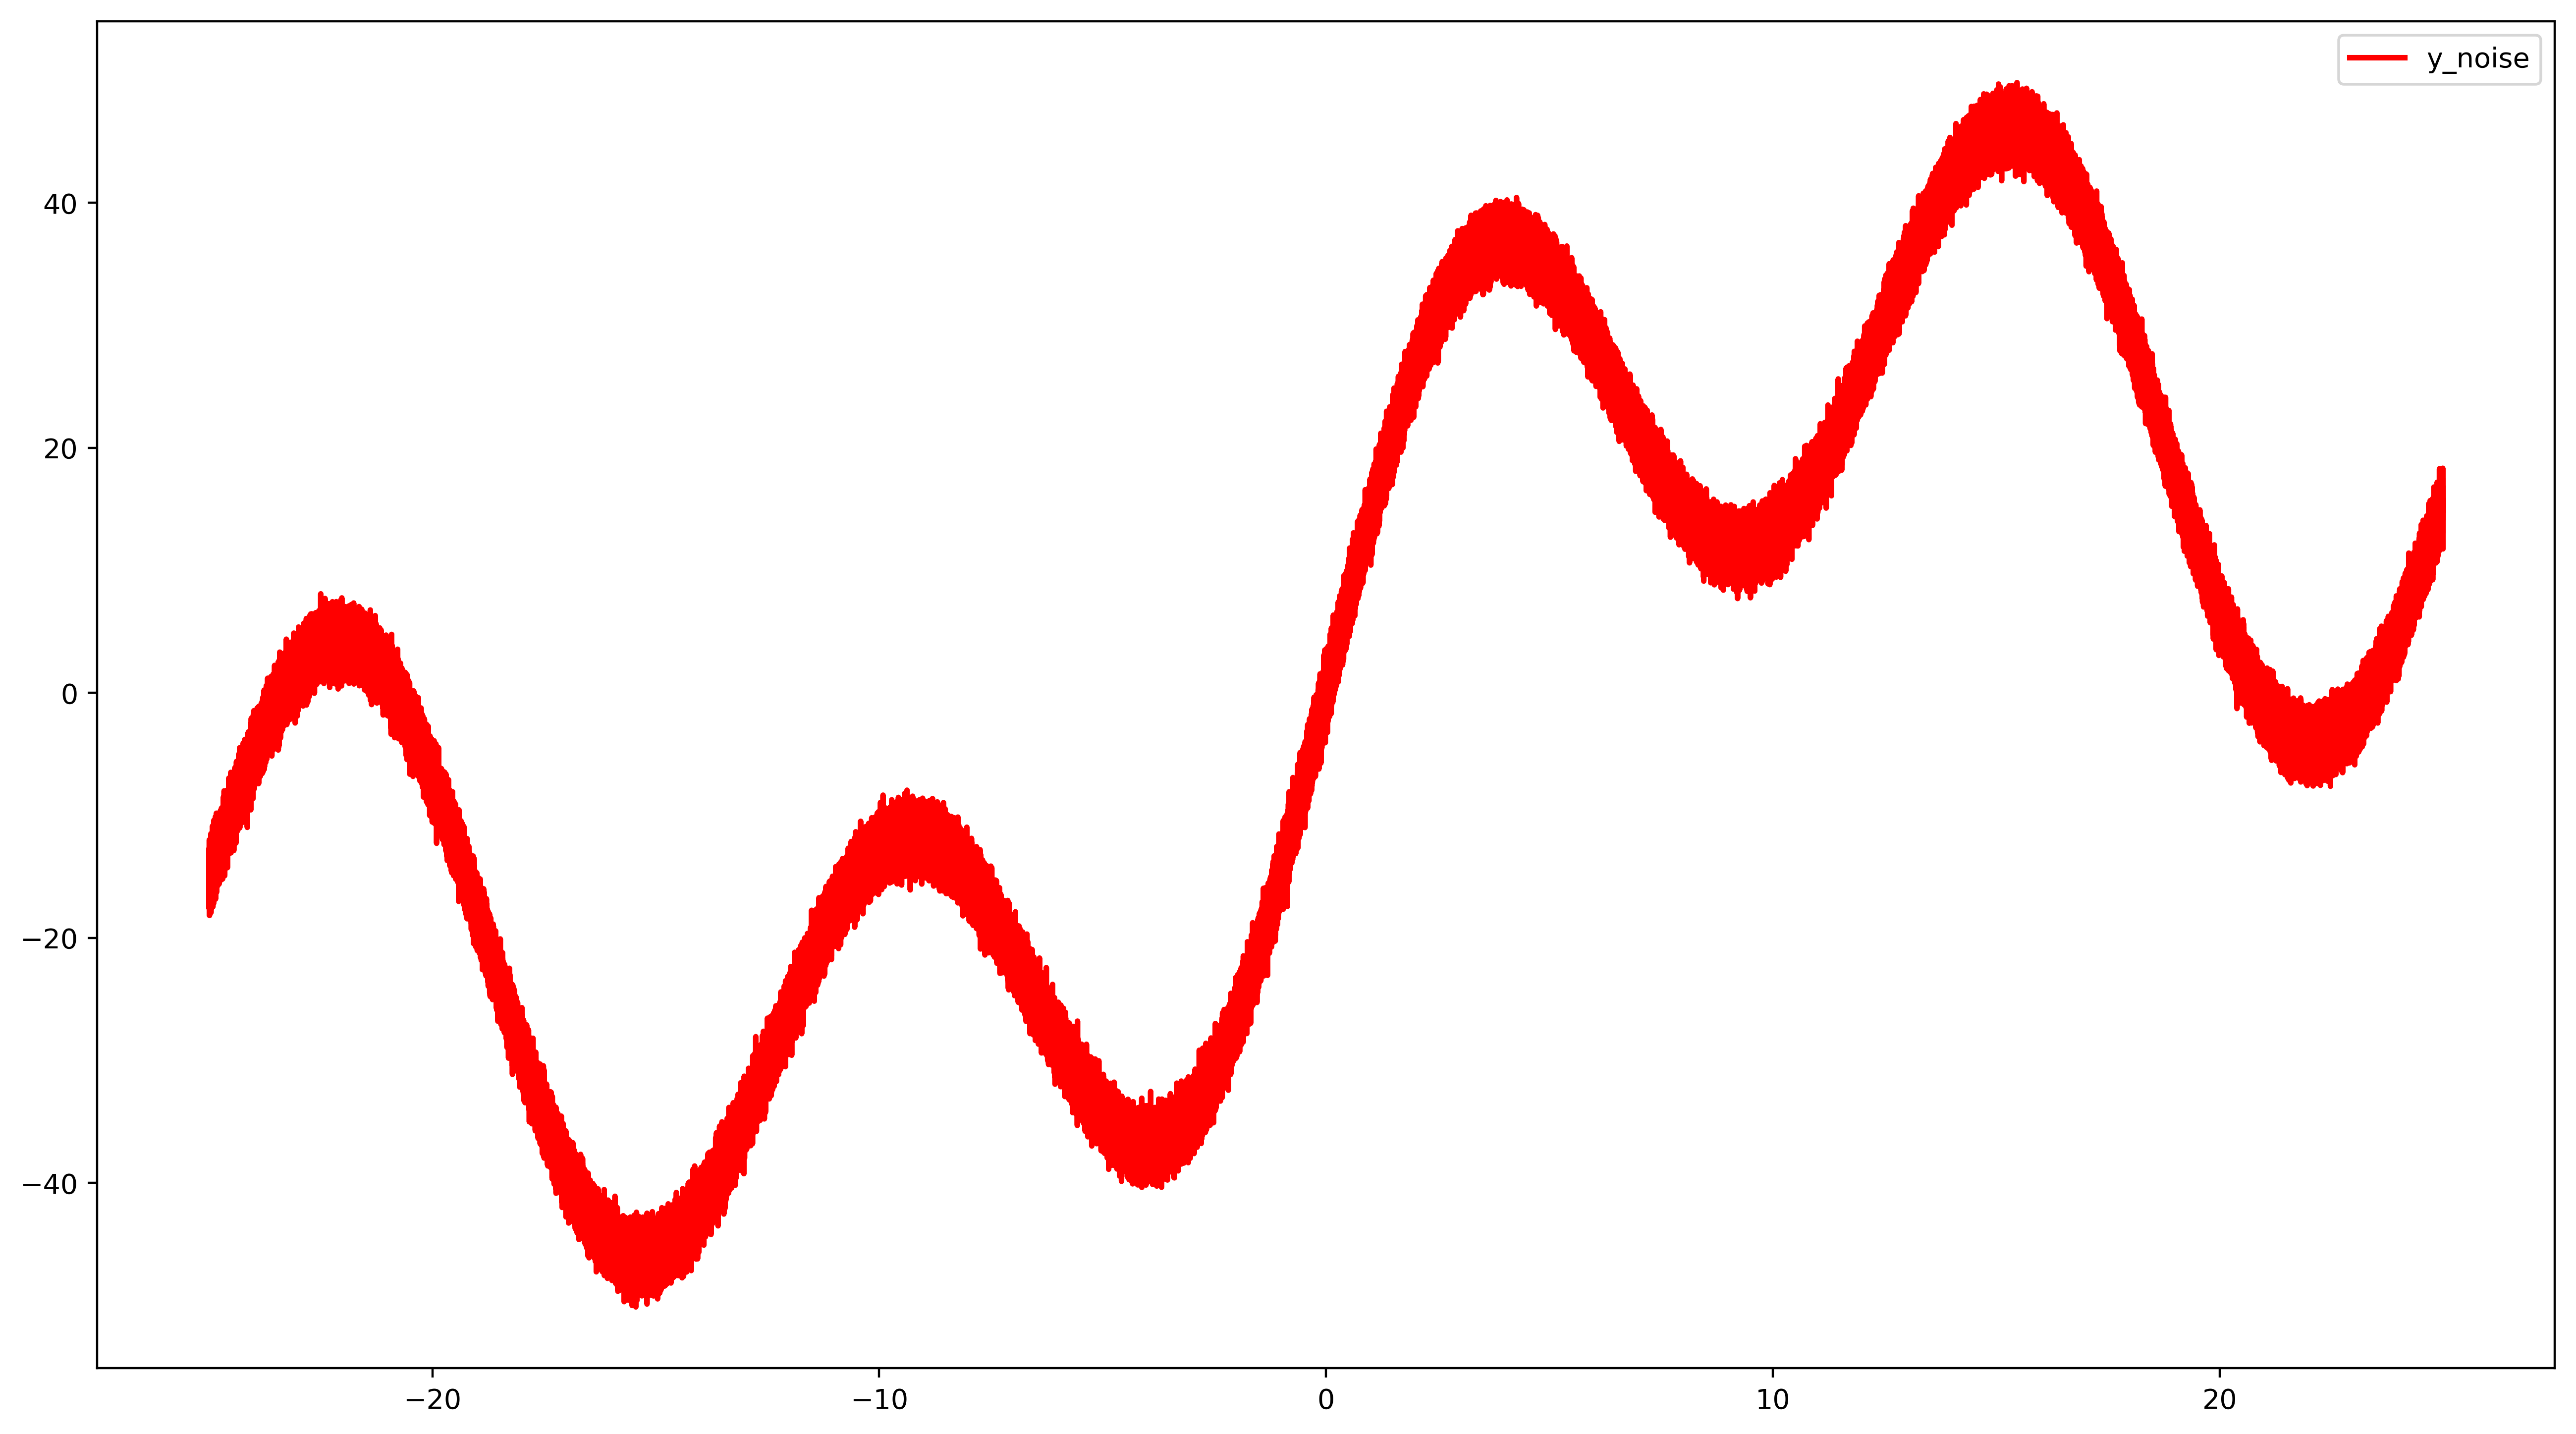

In [4]:
from numpy.random import normal
y_noise = y + normal(loc=0, scale=1, size=len(y))
fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
plt.legend()
plt.show()

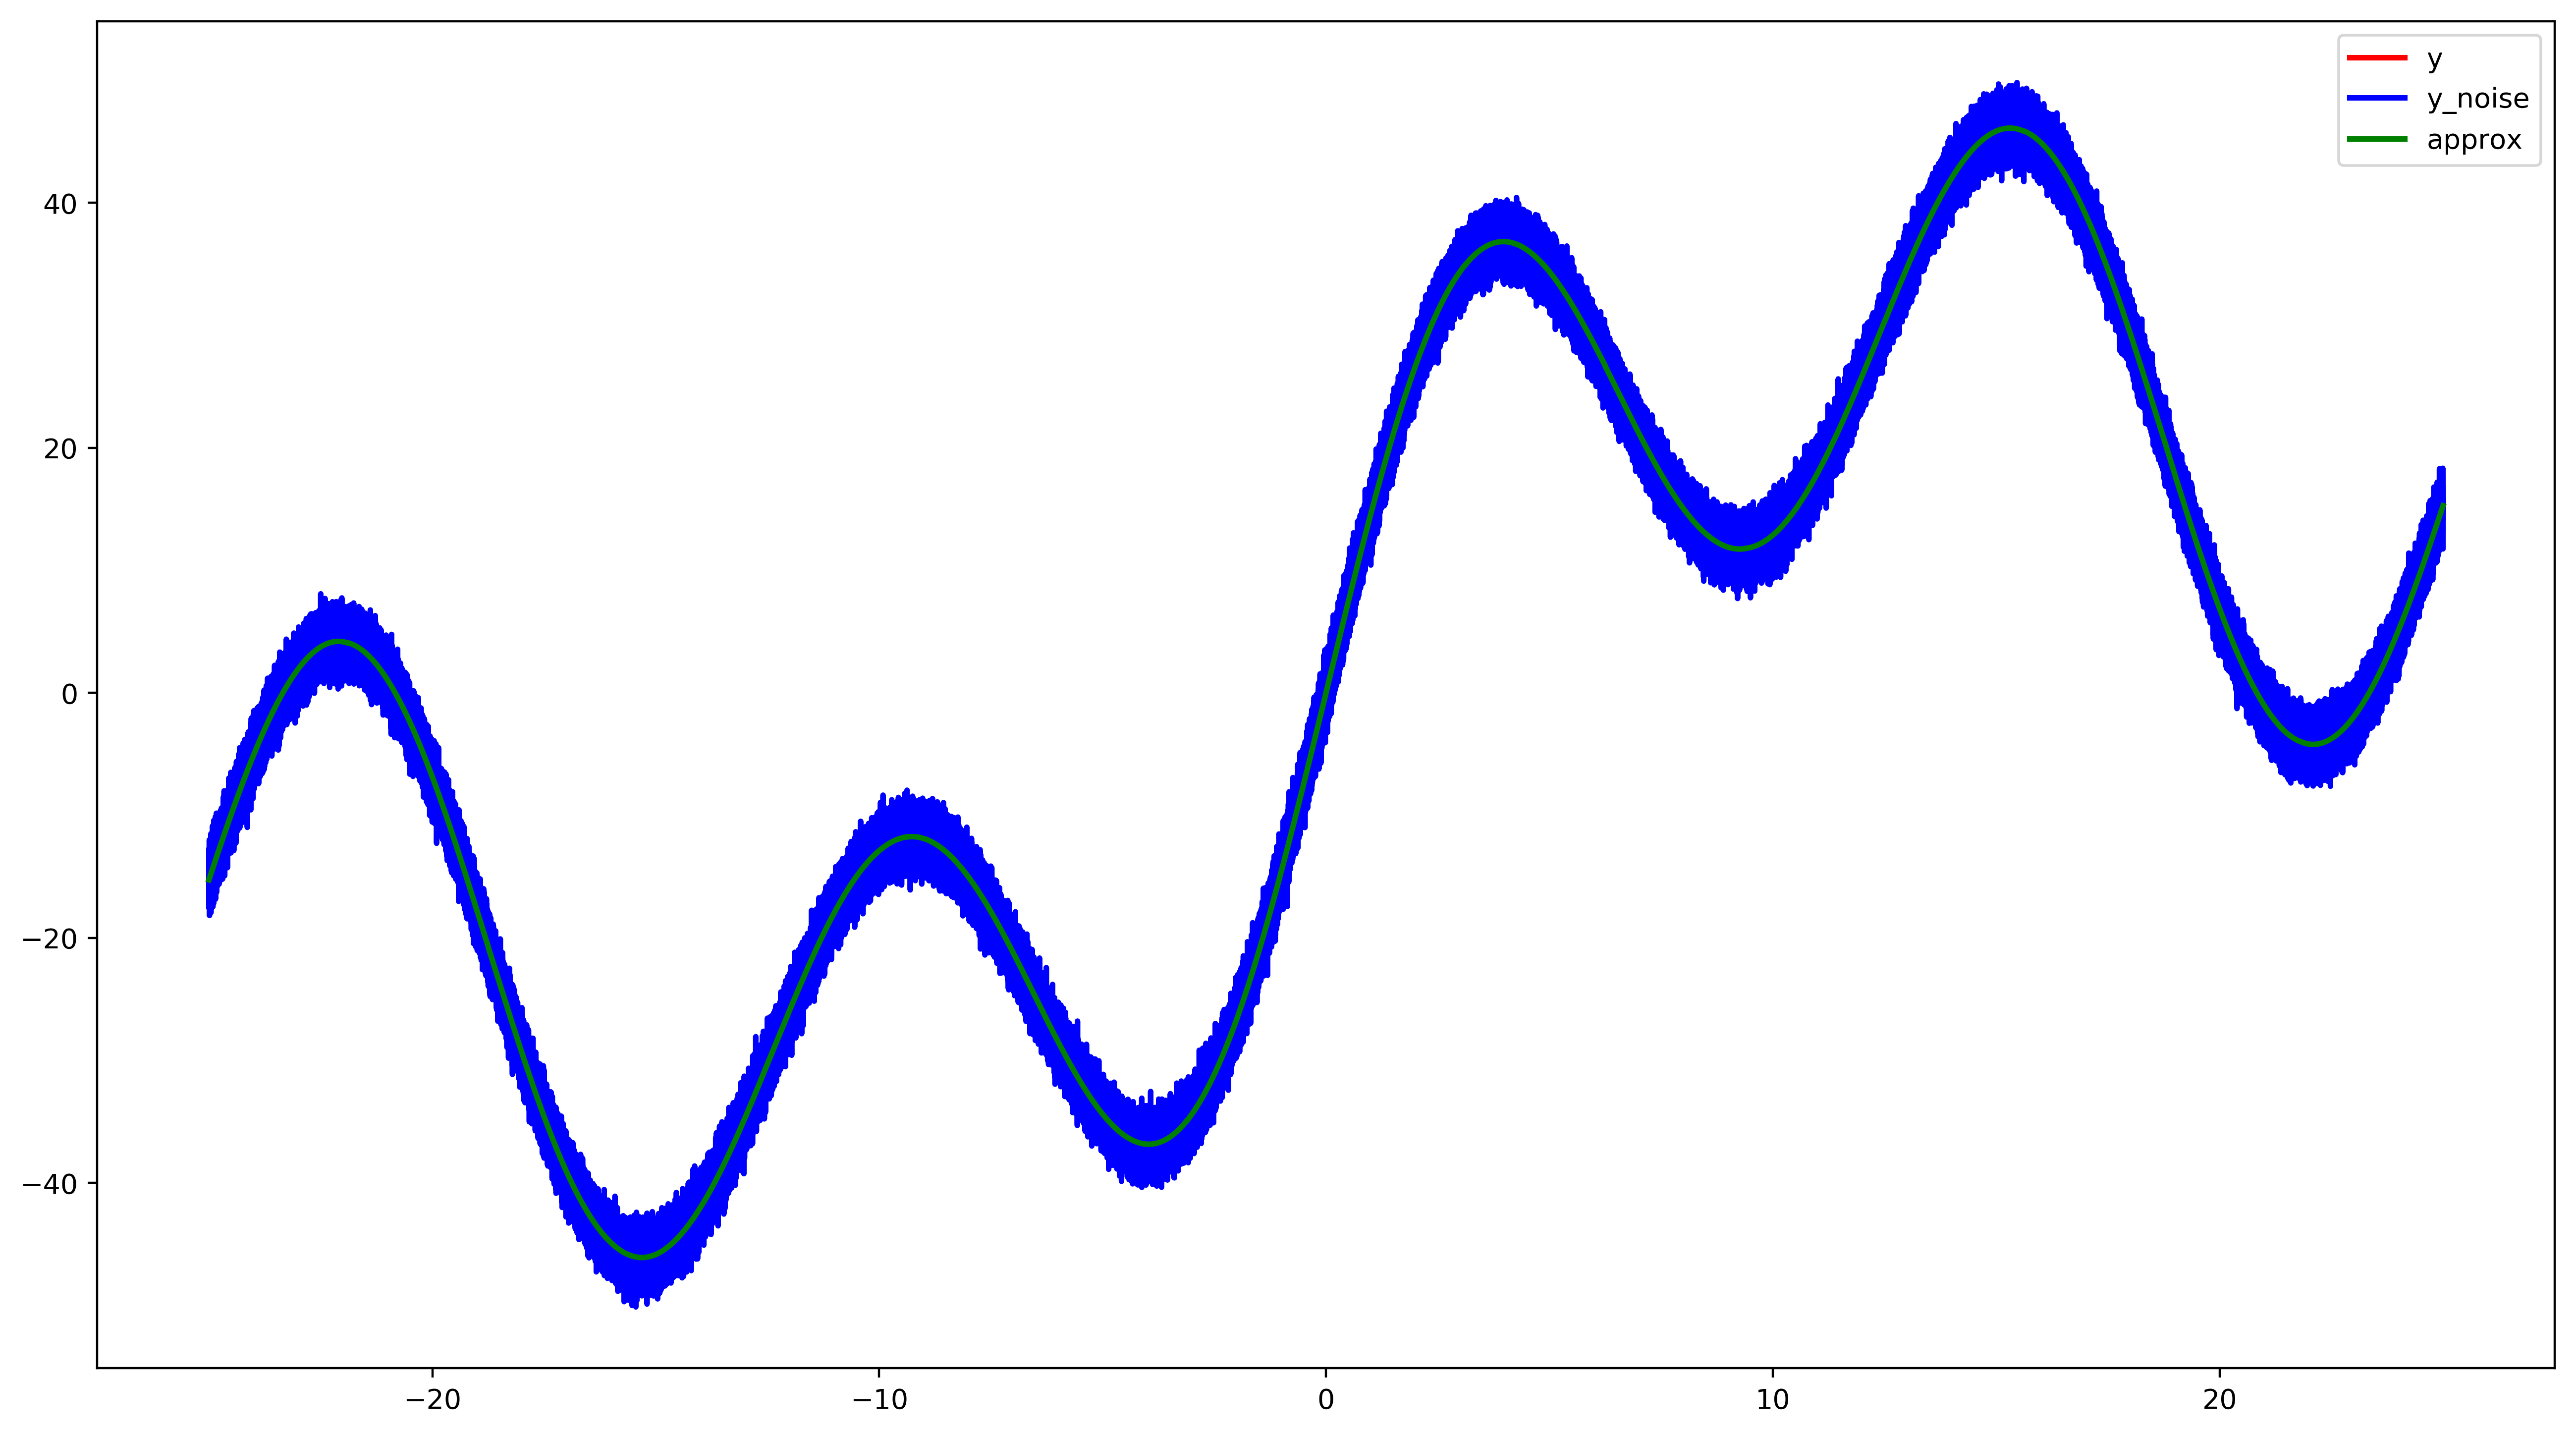

In [5]:
from numpy.polynomial import Polynomial

step = 2 ** 16
approx = np.zeros(0)
for i in range(0, len(x), step):
    c = Polynomial.fit(x[i:i + step], y_noise[i:i + step], deg=4)
    approx = np.append(approx, c(x[i:i + step]))
assert len(approx) == len(x)

fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y, color = 'red', lw = 2, label = 'y')
subplot.plot(x, y_noise, color = 'blue', lw = 2, label = 'y_noise')
subplot.plot(x, approx, color = 'green', lw = 2, label = 'approx')
plt.legend()
plt.show()

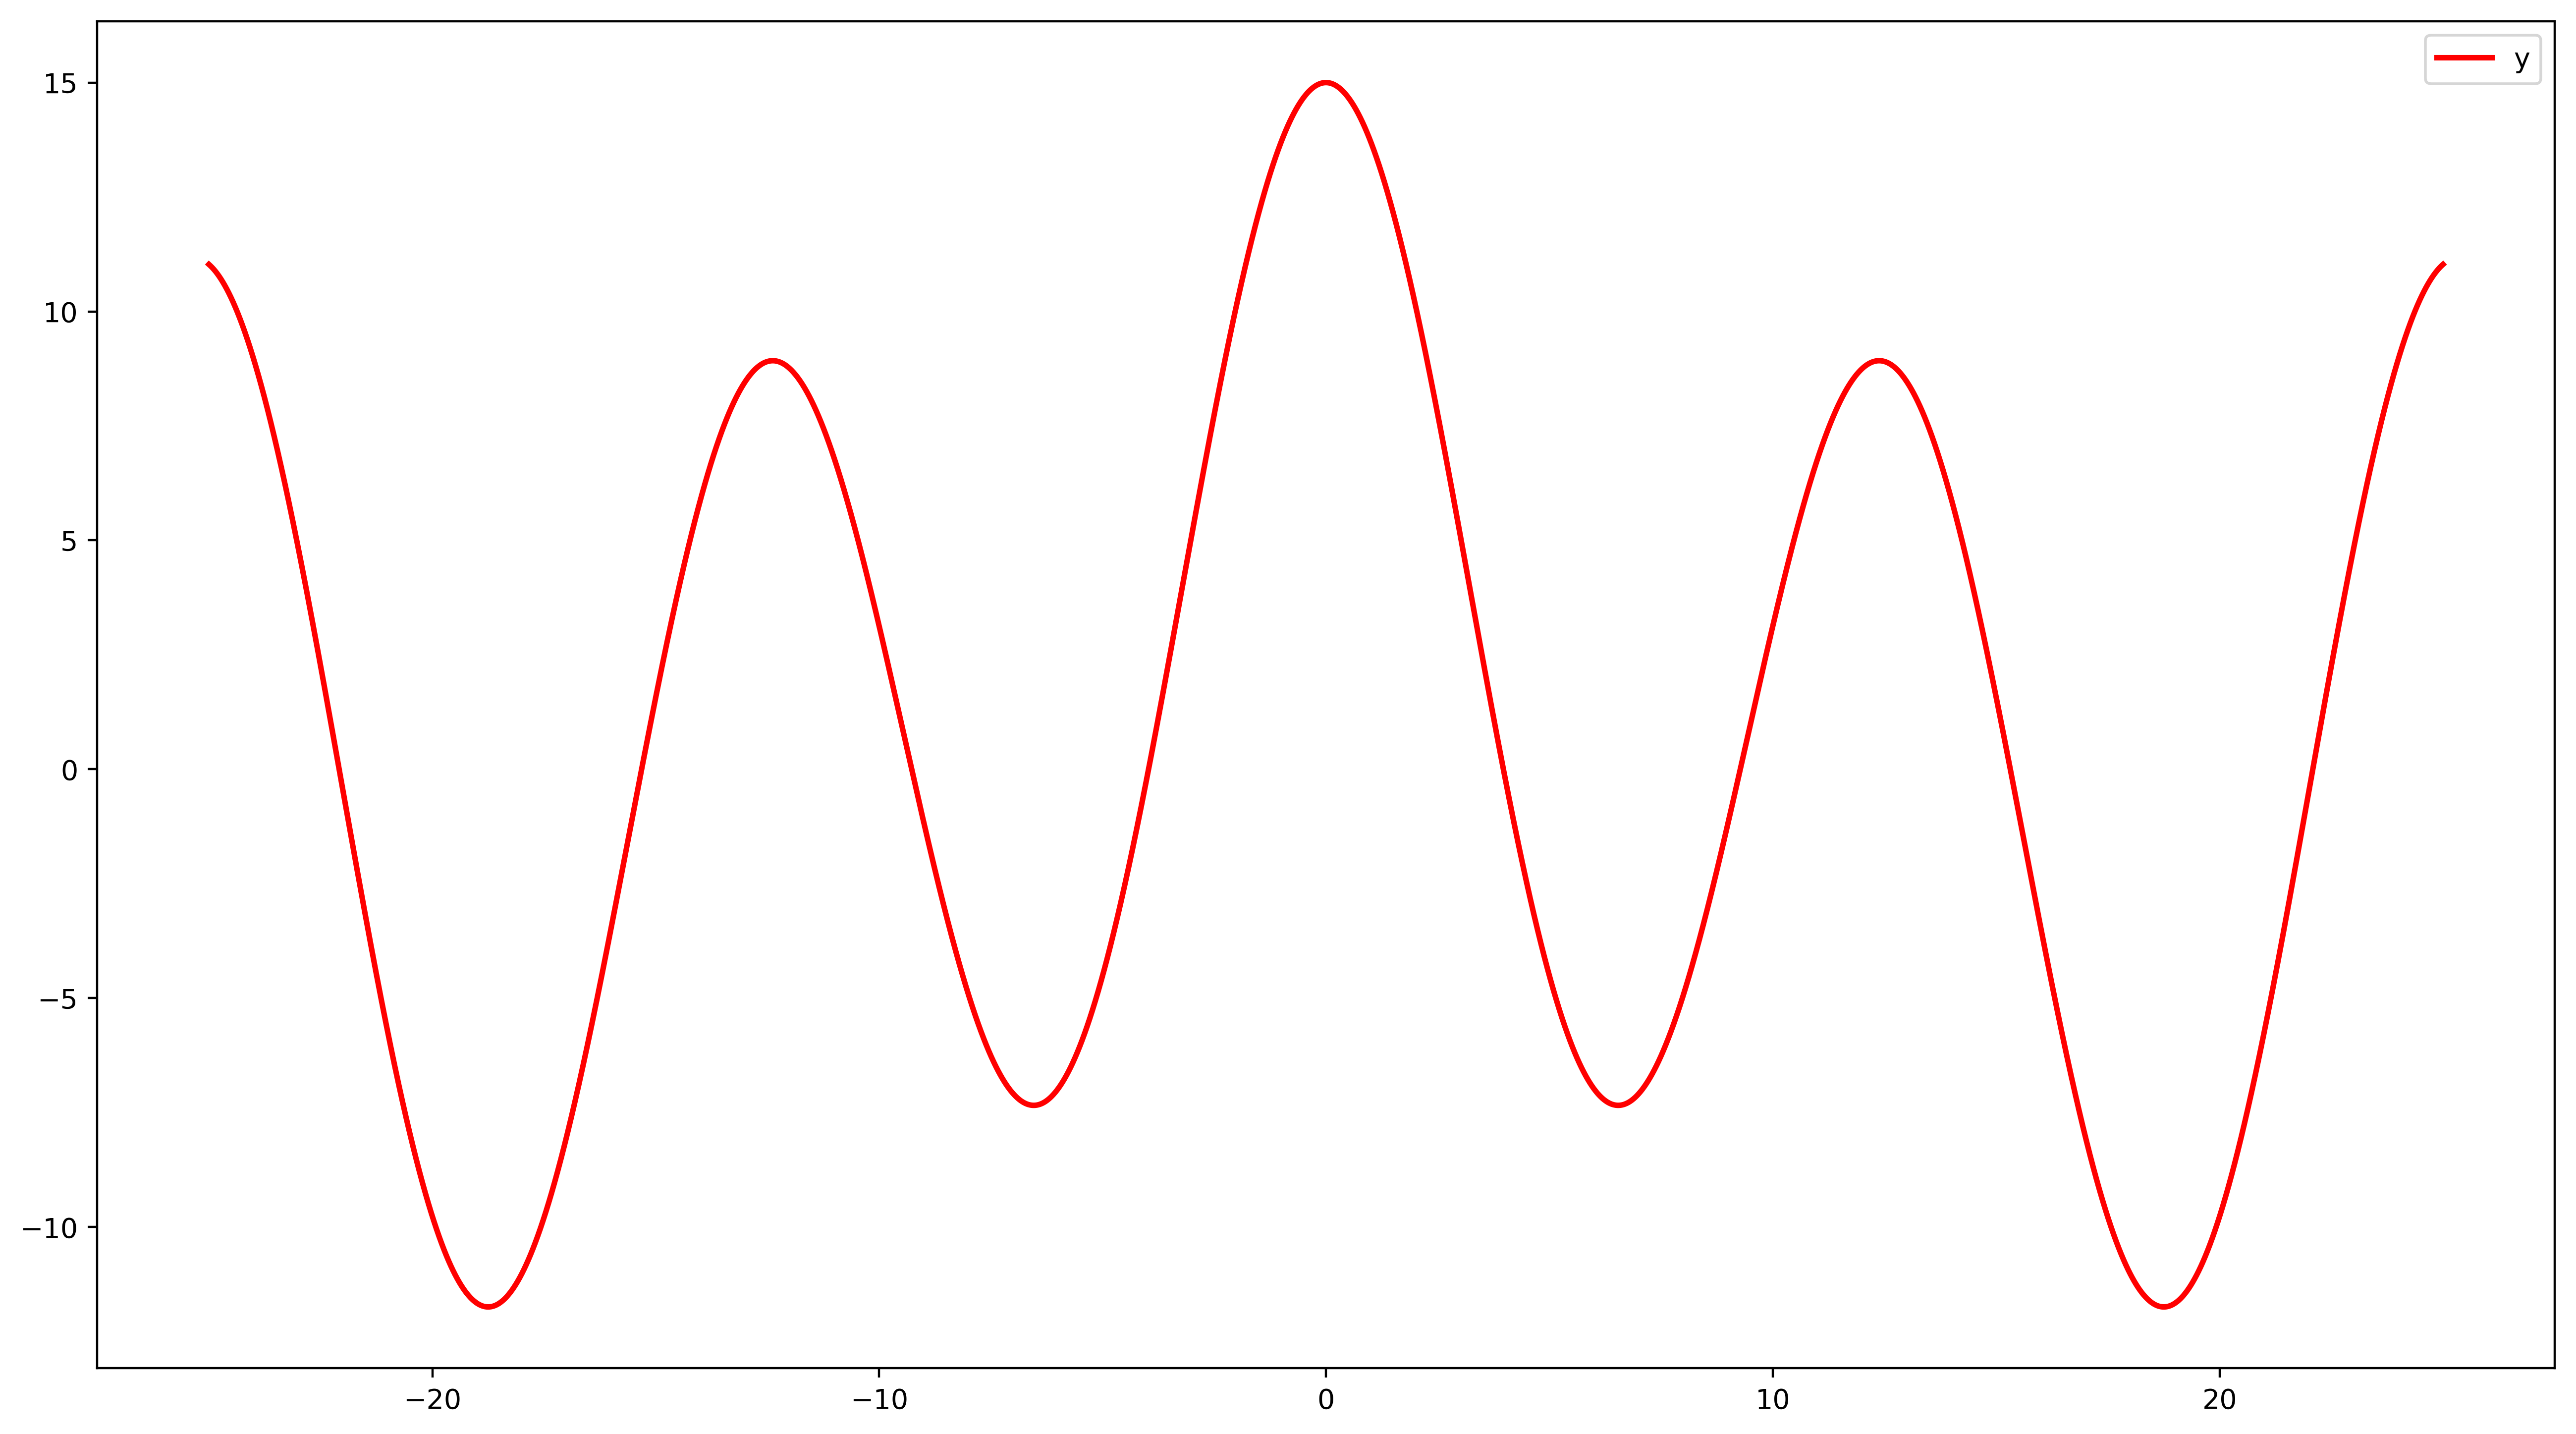

In [6]:
def f_prime(x: float):
    return 1 + cos(x / 10) + 3 * cos(x / 5) + 10 * cos(x / 2)

f_prime_vectorize = np.vectorize(f_prime)

fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, f_prime_vectorize(x), color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

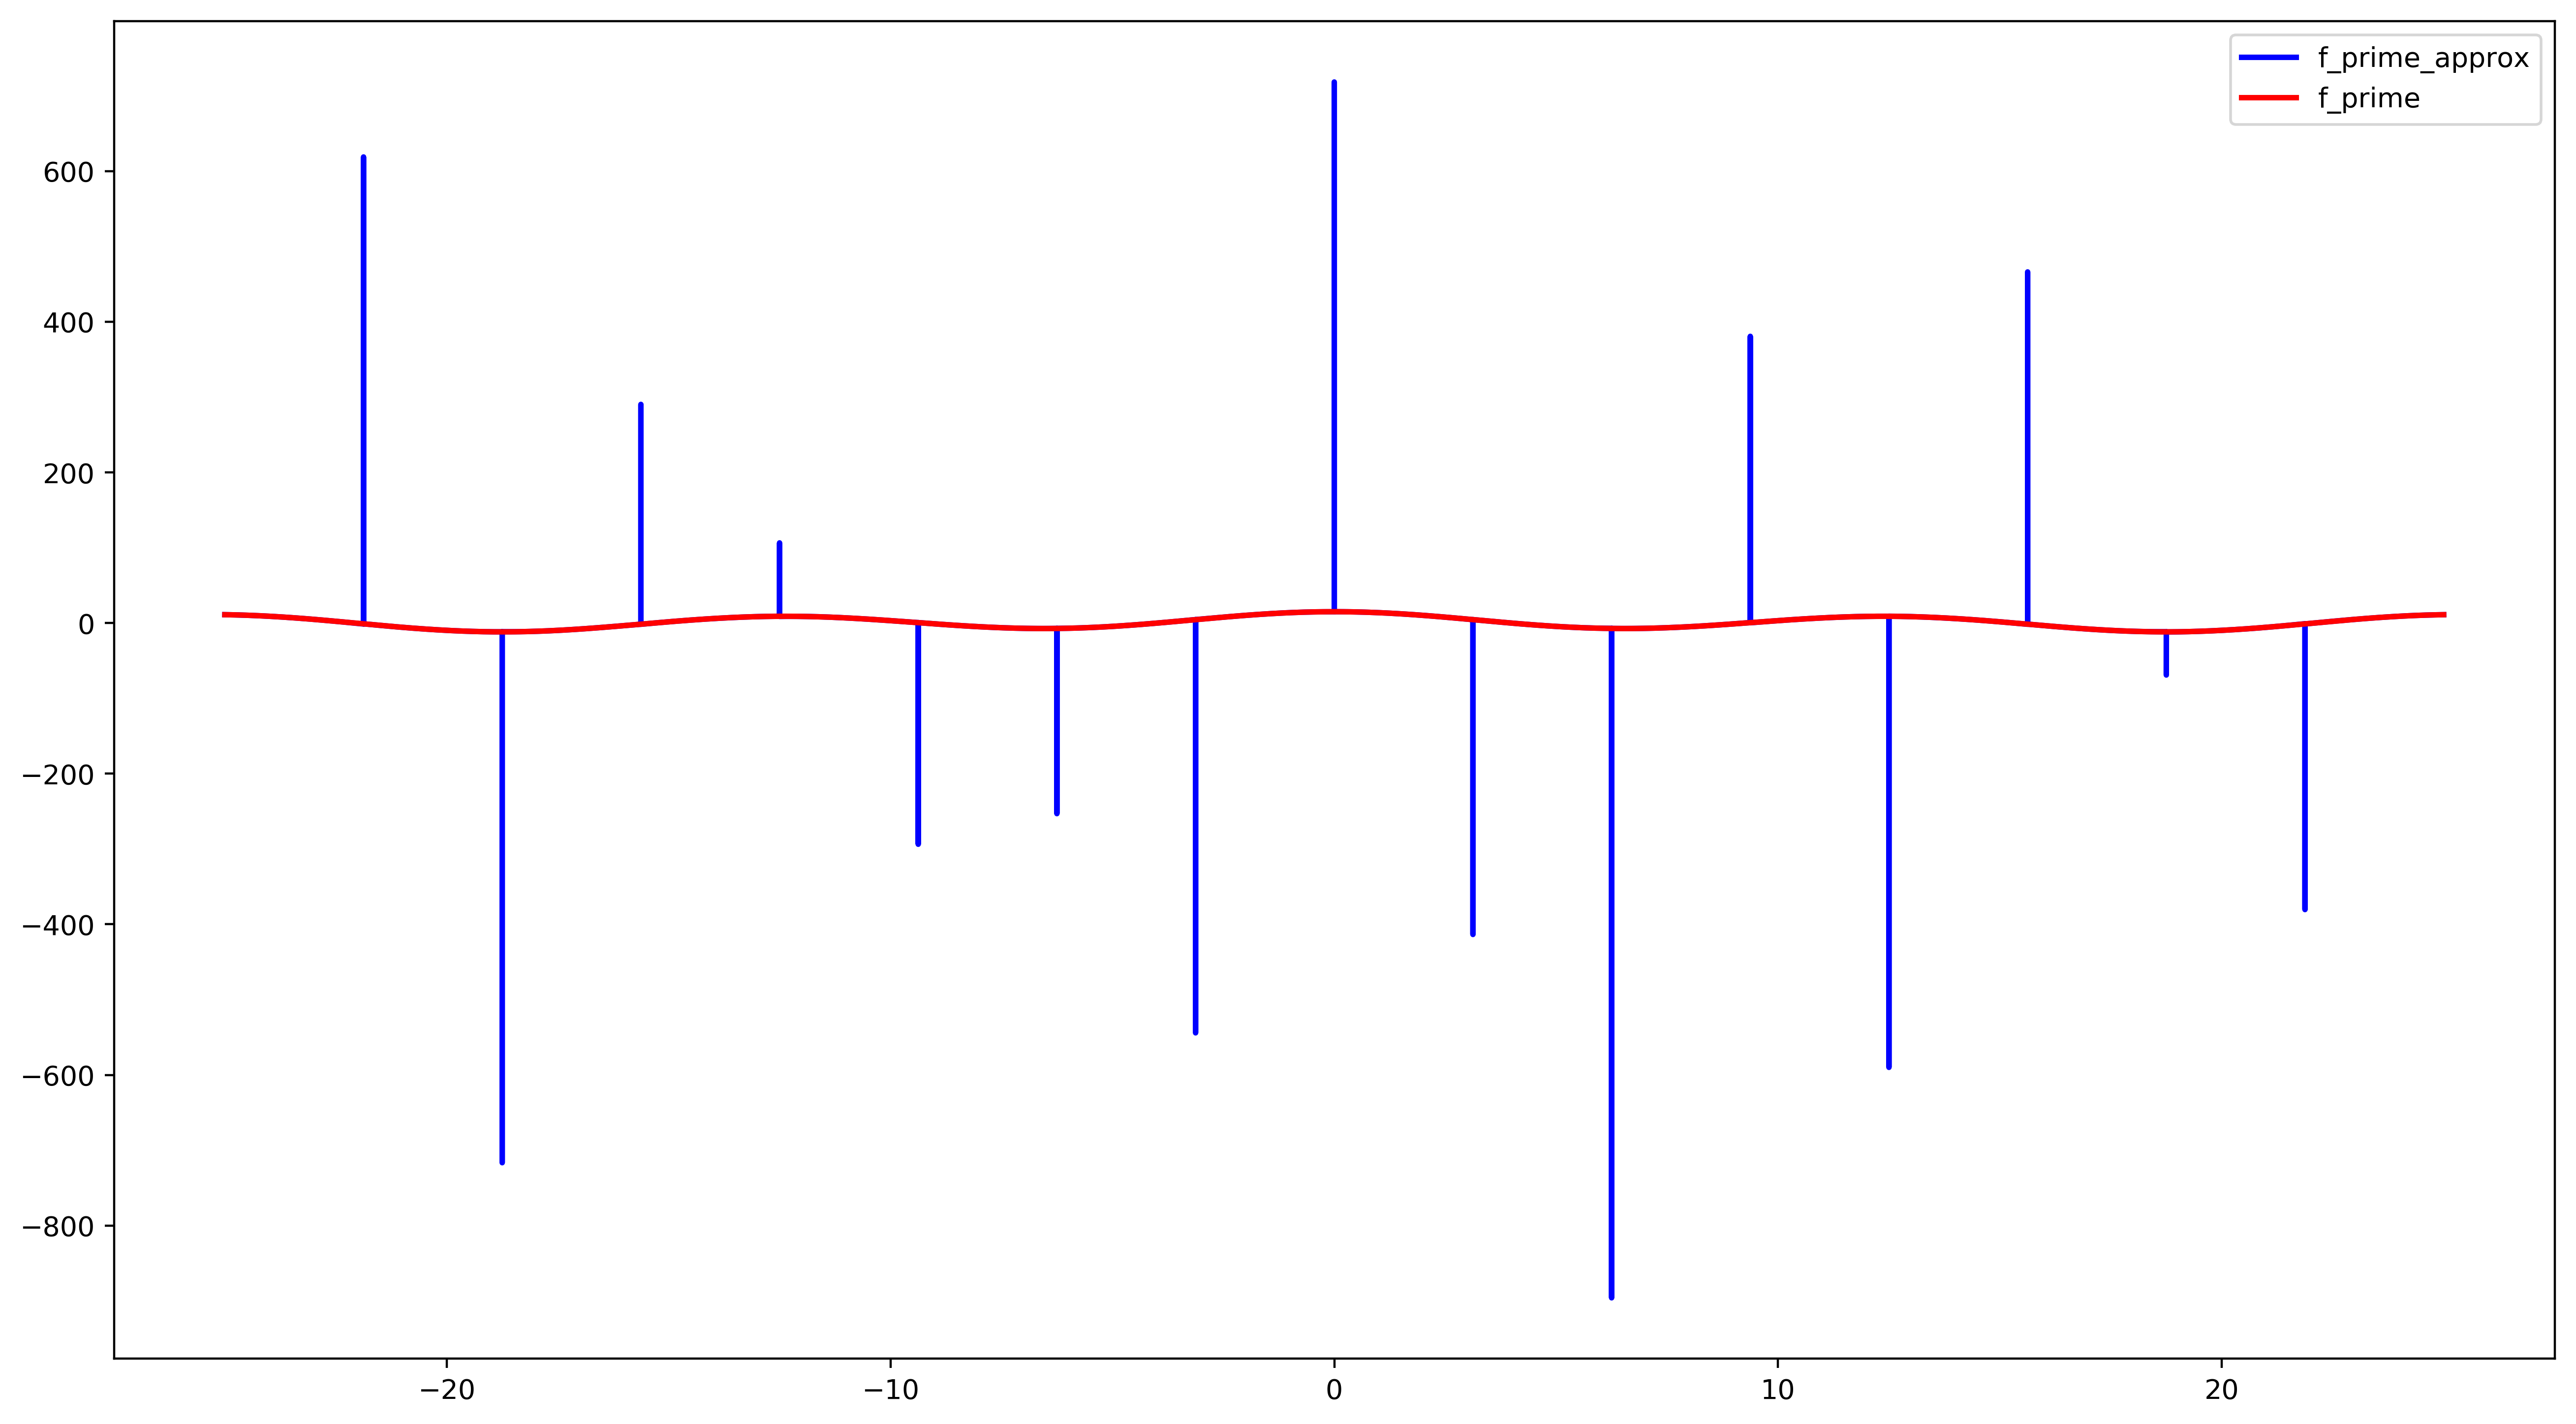

In [7]:

f_prime_approx = [(approx[i] - approx[i - 1]) / (x[i] - x[i - 1]) for i in range(1, len(approx))]
f_prime_approx = [f_prime_approx[0]] + f_prime_approx

fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, f_prime_approx, color = 'blue', lw = 2, label = 'f_prime_approx')
subplot.plot(x, f_prime_vectorize(x), color = 'red', lw = 2, label = 'f_prime')
plt.legend()
plt.show()

In [11]:
filter_prime = np.copy(f_prime_approx)
for i in range(2, len(filter_prime)):
    if abs(filter_prime[i] - filter_prime[i - 1]) > 25:
        print(f_prime_approx[i - 2:i+2])
        filter_prime[i] = 2.0 * filter_prime[i - 1] - filter_prime[i - 2]

[-1.3473874510407915, -1.3476738883014194, 618.7861908135383, -1.0637053342589529]
[-11.736570441715296, -11.73656534075466, -716.6043609354034, -11.51956346814242]
[-1.6236388498114587, -1.6234047264173255, 290.2603215224955, -1.6859159709718505]
[9.002347701486157, 9.002369273727632, 106.3803849659169, 8.716408121584061]
[0.523208066369351, 0.5230119819526845, -293.75919803040216, 0.5011597821231775]
[-7.191673659650769, -7.191629942367728, -253.1390002561209, -7.163663057618802]
[4.518356659042445, 4.518621970239191, -544.1985750772237, 4.5440779881031625]
[14.830327498302461, 14.83030163616978, 718.3018730884809, 14.963540955310744]
[4.423482563303649, 4.423215984466329, -413.55634584373036, 4.487631260627498]
[-7.0941343887954815, -7.094148967407138, -895.9935099859589, -7.214193633446208]
[0.5396696075595188, 0.5398910462032712, 380.62132377010255, 0.3145314431933706]
[8.907262437868178, 8.907244352346085, -590.0062312413932, 9.002445917926151]
[-1.7005133211187637, -1.7007773807

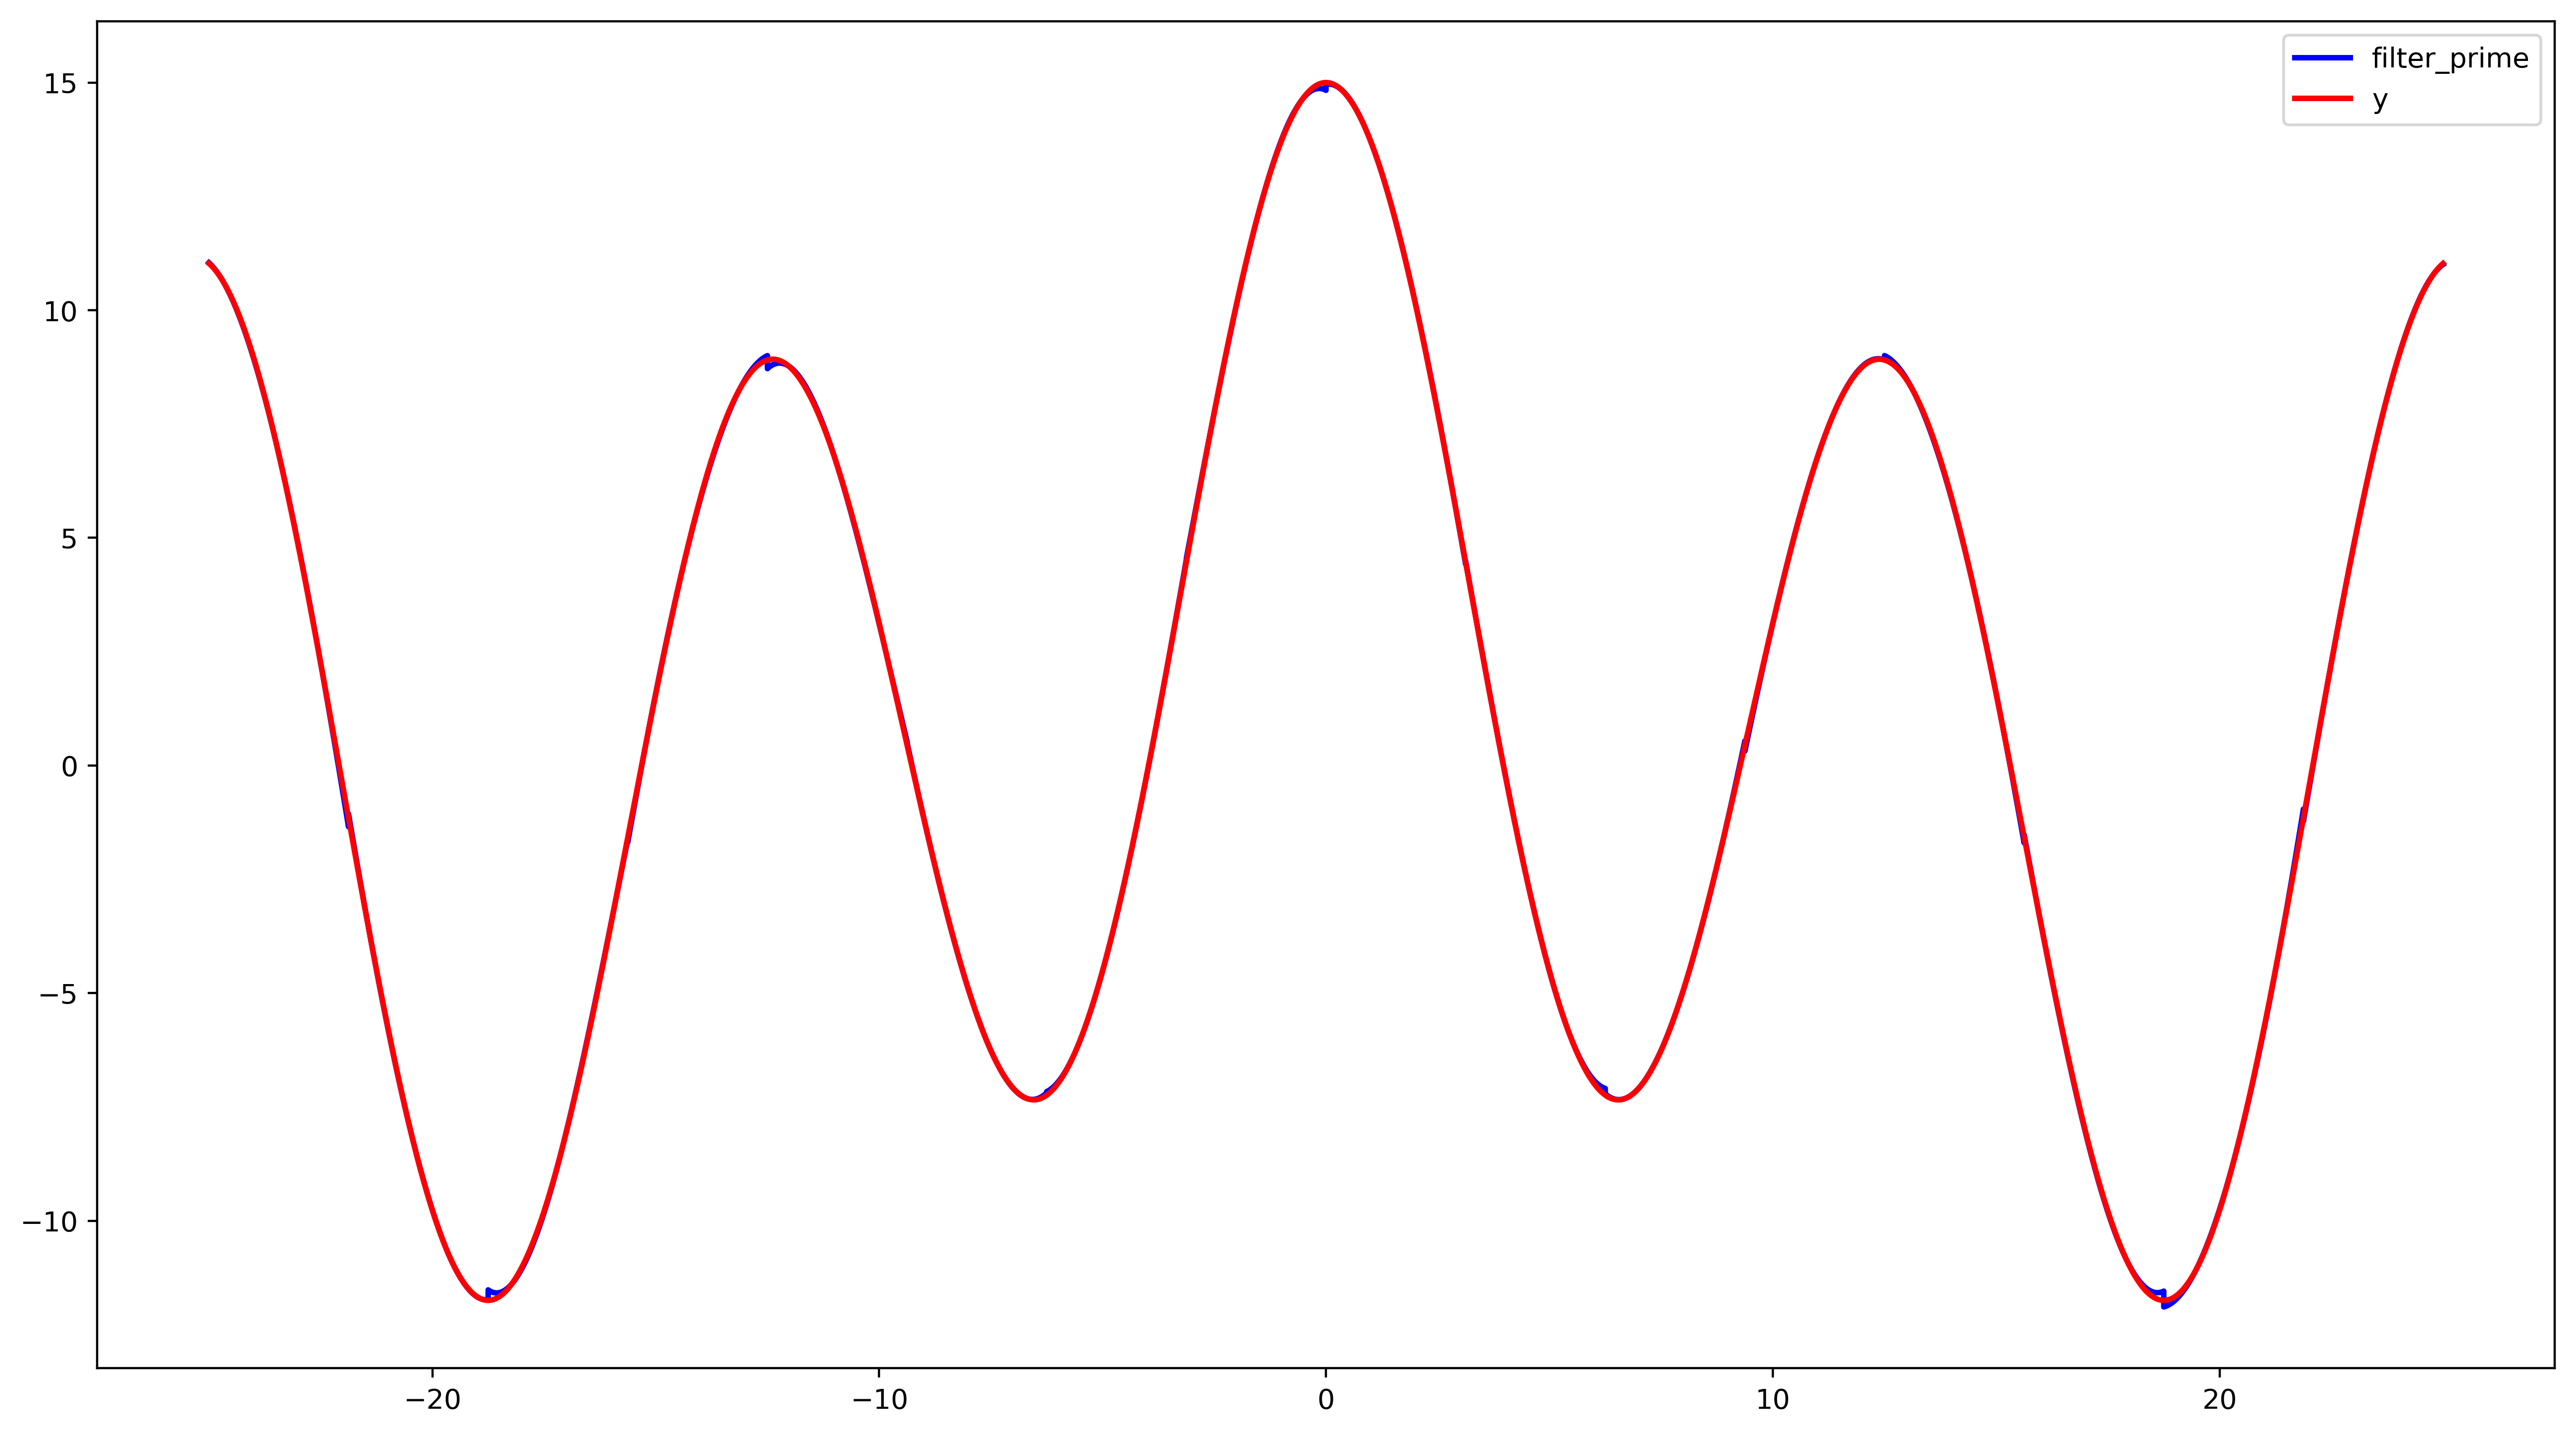

In [12]:
fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, filter_prime, color = 'blue', lw = 2, label = 'filter_prime')
subplot.plot(x, f_prime_vectorize(x), color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()